<a href="https://colab.research.google.com/github/wcrowley342/tourdefancedata/blob/main/TourDeFranceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rider Data Overview & Analysis

Source of the data: https://www.letour.fr/en/history

On its official website, the Tour de France lists riders’ results in its famed bicycle race since 1903. The site doesn’t provide downloads, but applied mathematician Thomas Camminady has scraped it to build a CSV file containing each finisher’s rank, time, team, and more.

**Import libraries and data**

Import necessary libraries from python. We'll use the pandas library for our data subset and manipulation operations and matplotlib for charting/graphing purposes

In [8]:
# Some basic, common libraries used:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib import rcParams
import seaborn as sns
sns.set_context("notebook", font_scale=1.25)
import plotly as py
import plotly.express as px

Scrape data (download from site into HTML format). Clean up data and convert into readable CSV
https://github.com/camminady/LeTourDataSet/blob/master/main.ipynb

In [9]:
#Read in data into "rider_df" data frame
# https://github.com/camminady/LeTourDataSet/blob/master/README.md

rider_df = pd.read_csv('https://raw.githubusercontent.com/camminady/LeTourDataSet/master/Riders.csv')
rider_df.head(3)

,Unnamed: 0,Year,Rider,Rank,Time,DistanceKilometer,PersonalAvgPace,Hours,Minutes,Seconds,Team,RiderNumber,TotalSeconds,Gap,Bonus,Points,NumberStages,ListedAvgPace
0,0,1903,MAURICE GARIN,1,94h 33' 14'',2428.0,25.678,94.0,33.0,14.0,TDF 1903 ***,1,340394.0,-,NaN,NaN,6.0,25.679
1,1,1903,LUCIEN POTHIER,2,97h 32' 35'',2428.0,24.892,97.0,32.0,35.0,TDF 1903 ***,37,351155.0,+ 02h 59' 21'',NaN,NaN,6.0,25.679
2,2,1903,FERNAND AUGEREAU,3,99h 02' 38'',2428.0,24.514,99.0,2.0,38.0,TDF 1903 ***,39,356558.0,+ 04h 29' 24'',NaN,NaN,6.0,25.679


inspect / visualize first 10 rows of data

In [10]:
rider_df.head()

,Unnamed: 0,Year,Rider,Rank,Time,DistanceKilometer,PersonalAvgPace,Hours,Minutes,Seconds,Team,RiderNumber,TotalSeconds,Gap,Bonus,Points,NumberStages,ListedAvgPace
0,0,1903,MAURICE GARIN,1,94h 33' 14'',2428.0,25.678,94.0,33.0,14.0,TDF 1903 ***,1,340394.0,-,NaN,NaN,6.0,25.679
1,1,1903,LUCIEN POTHIER,2,97h 32' 35'',2428.0,24.892,97.0,32.0,35.0,TDF 1903 ***,37,351155.0,+ 02h 59' 21'',NaN,NaN,6.0,25.679
2,2,1903,FERNAND AUGEREAU,3,99h 02' 38'',2428.0,24.514,99.0,2.0,38.0,TDF 1903 ***,39,356558.0,+ 04h 29' 24'',NaN,NaN,6.0,25.679
3,3,1903,RODOLPHE MULLER,4,99h 12' 44'',2428.0,24.473,99.0,12.0,44.0,TDF 1903 ***,33,357164.0,+ 04h 39' 30'',NaN,NaN,6.0,25.679
4,4,1903,JEAN-BAPTISTE FISCHER,5,99h 41' 58'',2428.0,24.353,99.0,41.0,58.0,TDF 1903 ***,12,358918.0,+ 05h 08' 44'',NaN,NaN,6.0,25.679


In [11]:
#read in another data set " -" that well use later 

# fetch the text from the URL and read it into a DataFrame
winners_df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')
winners_df.head(3)

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France


**Clean the data**

Replace any NaN / empty rows

In [12]:
#rider_df.fillna(0, inplace=True)

Drop the first column, which is unneessary

In [13]:
rider_df = rider_df.iloc[: , 1:]

rider_df.head()

,Year,Rider,Rank,Time,DistanceKilometer,PersonalAvgPace,Hours,Minutes,Seconds,Team,RiderNumber,TotalSeconds,Gap,Bonus,Points,NumberStages,ListedAvgPace
0,1903,MAURICE GARIN,1,94h 33' 14'',2428.0,25.678,94.0,33.0,14.0,TDF 1903 ***,1,340394.0,-,NaN,NaN,6.0,25.679
1,1903,LUCIEN POTHIER,2,97h 32' 35'',2428.0,24.892,97.0,32.0,35.0,TDF 1903 ***,37,351155.0,+ 02h 59' 21'',NaN,NaN,6.0,25.679
2,1903,FERNAND AUGEREAU,3,99h 02' 38'',2428.0,24.514,99.0,2.0,38.0,TDF 1903 ***,39,356558.0,+ 04h 29' 24'',NaN,NaN,6.0,25.679
3,1903,RODOLPHE MULLER,4,99h 12' 44'',2428.0,24.473,99.0,12.0,44.0,TDF 1903 ***,33,357164.0,+ 04h 39' 30'',NaN,NaN,6.0,25.679
4,1903,JEAN-BAPTISTE FISCHER,5,99h 41' 58'',2428.0,24.353,99.0,41.0,58.0,TDF 1903 ***,12,358918.0,+ 05h 08' 44'',NaN,NaN,6.0,25.679


# Explorator Data Analysis (EDA)

At the beginning of a data analysis we'll want to explore any possible relationships and other insights we can learn from the data.

Get the "shape" of the data frame (number of rows & columns)

In [14]:
print(rider_df.shape)

(9452, 17)


In [15]:
rider_df.describe()

,Year,Rank,DistanceKilometer,PersonalAvgPace,Hours,Minutes,Seconds,RiderNumber,TotalSeconds,Points,NumberStages,ListedAvgPace
count,9452.000000,9452.000000,9452.000000,9255.000,9255.000000,9255.000000,9255.000000,9452.000000,9.255000e+03,197.000000,9452.000000,9151.000000
mean,1981.128862,57.569086,3966.960643,inf,109.949109,29.063425,29.193625,89.031845,3.975898e+05,325.182741,21.352730,36.589313
std,29.744678,41.113251,572.318961,NaN,38.219958,17.466952,17.526999,60.261518,1.376514e+05,166.116559,2.311157,4.255119
min,1903.000000,1.000000,2428.000000,12.351,0.000000,0.000000,0.000000,1.000000,0.000000e+00,37.000000,6.000000,24.056000
25%,1962.000000,23.000000,3525.000000,34.830,89.000000,14.000000,14.000000,36.000000,3.226100e+05,175.000000,21.000000,34.906000
50%,1988.000000,49.000000,3846.000000,37.668,98.000000,29.000000,29.000000,83.000000,3.530660e+05,327.000000,21.000000,38.059000
75%,2005.000000,86.000000,4274.000000,39.110,119.000000,44.000000,45.000000,133.000000,4.288855e+05,479.000000,23.000000,39.788000
max,2020.000000,174.000000,5745.000000,inf,299.000000,59.000000,59.000000,321.000000,1.078413e+06,596.000000,26.000000,41.654000


In [16]:
rider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9452 entries, 0 to 9451
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               9452 non-null   int64  
 1   Rider              9452 non-null   object 
 2   Rank               9452 non-null   int64  
 3   Time               9255 non-null   object 
 4   DistanceKilometer  9452 non-null   float64
 5   PersonalAvgPace    9255 non-null   float64
 6   Hours              9255 non-null   float64
 7   Minutes            9255 non-null   float64
 8   Seconds            9255 non-null   float64
 9   Team               9452 non-null   object 
 10  RiderNumber        9452 non-null   int64  
 11  TotalSeconds       9255 non-null   float64
 12  Gap                9255 non-null   object 
 13  Bonus              164 non-null    object 
 14  Points             197 non-null    float64
 15  NumberStages       9452 non-null   float64
 16  ListedAvgPace      9151 

look the aggregates for each year

In [ ]:
rider_df.groupby('Year').agg([np.mean,np.median])

Unnamed: 0          Rank         ... NumberStages        ListedAvgPace        
           mean  median  mean median  ...         mean median          mean  median
Year                                  ...                                          
1903       10.0    10.0  11.0   11.0  ...          6.0    6.0        25.679  25.679
1904       28.0    28.0   8.0    8.0  ...          6.0    6.0        25.265  25.265
1905       47.5    47.5  12.5   12.5  ...         11.0   11.0        27.107  27.107
1906       66.5    66.5   7.5    7.5  ...         13.0   13.0        24.463  24.463
1907       90.0    90.0  17.0   17.0  ...         14.0   14.0        28.470  28.470
...         ...     ...   ...    ...  ...          ...    ...           ...     ...
2016     8751.5  8751.5  87.5   87.5  ...         21.0   21.0        39.571  39.571
2017     8922.0  8922.0  84.0   84.0  ...         21.0   21.0        40.995  40.995
2018     9078.0  9078.0  73.0   73.0  ...         21.0   21.0        40.206  40.206
2019     9228.0  9228.0  78.0   78.0  ...         21.0   21.0           NaN     NaN
2020     9378.5  9378.5  73.5   73.5  ...         21.0   21.0           NaN     NaN

[107 rows x 24 columns]

What if we were curious as to which riders competed in the most Tour De Frances, Tours De France, Tours Des Frances? Lets go with races....

In [17]:
rider_df['Rider'].value_counts()[:10]

SYLVAIN CHAVANEL     16
VJATCESLAV EKIMOV    15
THOMAS VOECKLER      15
JOOP ZOETEMELK       15
HAIMAR ZUBELDIA      15
LUCIEN VAN IMPE      15
STUART O'GRADY       15
JENS VOIGT           14
JÉRÔME PINEAU        13
PHIL ANDERSON        13
Name: Rider, dtype: int64

It looks like French cyclist Sylvain Chavanel leads the pack with 16 entries into the Tour!

Lets unpack this line of code a bit...

In [ ]:
#rider_df['Rider] selects the "Rider" column from our dataframe, generating a series 

#.values_counts() is a method counting the values in this new series; this actually creates a new series where the index is the Rider and the values are how often they occured (descending from most frequent)

#[:10] gives us the first 10 most frequently occuring riders from this series; ultimately creating a final series, which is displayed above

lets add a simple bar chart to visually represent this. Because Python performs these steps from left to right, you can add .plot() method to the right of your previous line of code in order to visualize the results:

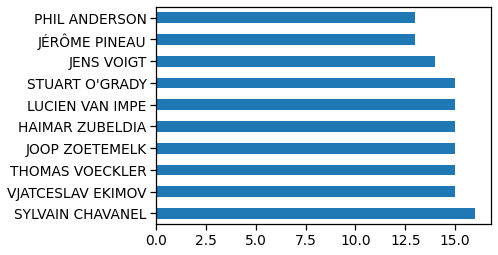

In [18]:
rider_df['Rider'].value_counts()[:10].plot(kind='barh')

and how about teams? Which teams competed or were represented the most:

In [19]:
rider_df['Team'].value_counts()[:10]

FRANCE                 193
BELGIQUE               170
TOURISTES ROUTIERS     151
ITALIE                 150
TOURISTES-ROUTIERS     123
ISOLES                 116
RABOBANK               102
AG2R LA MONDIALE        91
EUSKALTEL - EUSKADI     90
ESPAGNE                 82
Name: Team, dtype: int64

here's a good example of where proper data cleaning comes into play, as "Touriste-Routiers" (which translates to "tourists of the road") is - incorrectly - counted seperately from "Touristes Routiers"

Well use the .replace method to clean this up

In [20]:
rider_df['Team'].replace(['TOURISTES ROUTIERS'],'TOURISTES-ROUTIERS', inplace = True)

In [21]:
rider_df['Team'].value_counts()[:10]

TOURISTES-ROUTIERS     274
FRANCE                 193
BELGIQUE               170
ITALIE                 150
ISOLES                 116
RABOBANK               102
AG2R LA MONDIALE        91
EUSKALTEL - EUSKADI     90
ESPAGNE                 82
BANESTO                 77
Name: Team, dtype: int64

that's better!

# Graphs & Visual Analysis

Create the columns/variables needed for the visualization

In [22]:
year = np.unique(rider_df["Year"])
distance = rider_df.groupby("Year").agg("mean")["DistanceKilometer"].values
winnerpace = rider_df.groupby("Year").first()["PersonalAvgPace"]
winner = rider_df.groupby("Year").first()["Rider"]
meantime = rider_df.groupby("Year").agg("mean")["TotalSeconds"]
meanpace = distance/meantime*3600

Well want to create a new, trimmed down dataframe using these variables to run additional analysis.

In [23]:
# Create the arrays for the above columns/variables 
array_year = np.array(year)
array_distance = np.array(distance)
array_winnerpace = np.array(winnerpace)
array_winner = np.array(winner)
array_meantime = np.array(meantime)
array_meanpace = np.array(meanpace)

In [24]:
#construct the new dataframe - df2 - from a dictionary
data = {'year2': array_year, 'distance2': array_distance, 'winnerpace2': array_winnerpace, 'winner_name': array_winner, 'meantime2': array_meantime, 'meanpace2': array_meanpace}
df2 = pd.DataFrame(data)
df2.fillna(0, inplace=True)
df2.describe()

,year2,distance2,winnerpace2,meantime2,meanpace2
count,107.000000,107.000000,107.0000,107.000000,107.000000
mean,1964.392523,4207.766355,inf,428367.808159,inf
std,34.406767,702.643869,NaN,203755.901478,NaN
min,1903.000000,2428.000000,0.0000,0.000000,0.000000
25%,1933.500000,3649.500000,31.2165,331090.563282,30.629930
50%,1967.000000,4138.000000,35.8820,413971.935714,35.304341
75%,1993.500000,4649.000000,39.2685,516788.546113,38.329431
max,2020.000000,5745.000000,inf,910068.181818,inf


In [25]:
df2.head(20)

,year2,distance2,winnerpace2,winner_name,meantime2,meanpace2
0,1903,2428.0,25.678,MAURICE GARIN,414368.428571,21.094271
1,1904,2428.0,25.266,HENRI CORNET (GEBOREN JARDY),441867.733333,19.781485
2,1905,2994.0,inf,LOUIS TROUSSELIER,0.000000,inf
3,1906,4637.0,inf,RENÉ POTTIER,0.000000,inf
4,1907,4488.0,0.000,LUCIEN MAZAN DIT PETIT-BRETON,0.000000,0.000000
5,1908,4488.0,inf,LUCIEN MAZAN DIT PETIT-BRETON,0.000000,inf
6,1909,4497.0,0.000,FRANÇOIS FABER,0.000000,0.000000
7,1910,4734.0,0.000,OCTAVE LAPIZE,0.000000,0.000000
8,1911,5343.0,0.000,GUSTAVE GARRIGOU,0.000000,0.000000
9,1912,5289.0,0.000,ODIEL DEFRAEYE,0.000000,0.000000


here is where we'll try to merge the two datasets on the "winner_name" field...

In [29]:
 #combined_data = pd.merge(df2, winners_df, on="winner_name")

In [30]:
#combined_data.head(4)

**Simple time series graph of the winners avg pace each year**

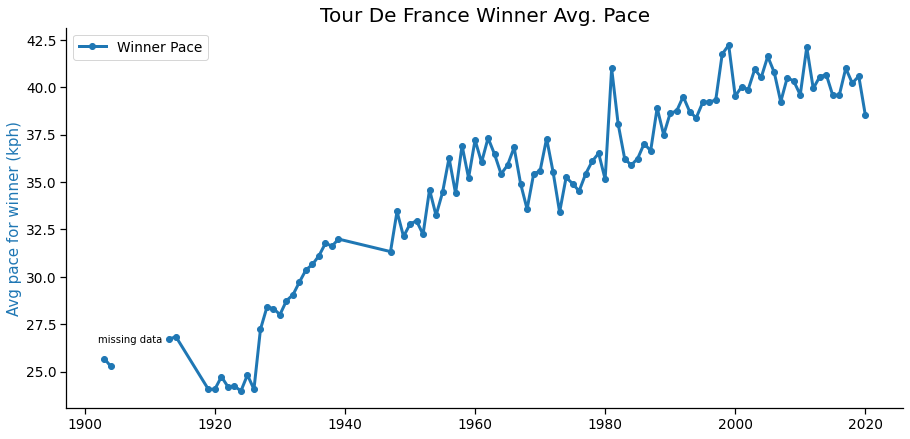

In [ ]:
#1st line (winner pace)
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,winnerpace, "-o",lw=3, label = 'Winner Pace')
ax.set_ylabel("Avg pace for winner (kph)",fontsize = 15, color= "tab:blue")
ax.set_title('Tour De France Winner Avg. Pace', fontsize = 20)
ax.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 360
sns.despine()

#2nd line trendline
#https://dzone.com/articles/python-how-to-add-trend-line-to-line-chartgraph 

#z = numpy.polyfit(year, winnerpace, 1)
#p = numpy.poly1d(z)
#pylab.plot(year,p(year))
#print “winnerpace =%.6fx+(%.6f)”%(z[0],z[1])

z = np.polyfit(year, winnerpace, 1)
p = np.poly1d(z)
#ax2.plot(year,p(year),"r--")

#add annotation

ax.text(1902.000000, 26.5, "missing data")


fig.show()

**Line Plot showing number of riders over time**

In [ ]:
gk = rider_df.groupby('Year')

gk.count()

,Unnamed: 0,Rider,Rank,Time,DistanceKilometer,PersonalAvgPace,Hours,Minutes,Seconds,Team,RiderNumber,TotalSeconds,Gap,Bonus,Points,NumberStages,ListedAvgPace
Year,,,,,,,,,,,,,,,,,
1903,21,21,21,21,21,21,21,21,21,21,21,21,21,0,0,21,21
1904,15,15,15,15,15,15,15,15,15,15,15,15,15,0,0,15,15
1905,24,24,24,24,24,24,24,24,24,24,24,24,24,0,0,24,24
1906,14,14,14,14,14,14,14,14,14,14,14,14,14,0,0,14,14
1907,33,33,33,0,33,0,0,0,0,33,33,0,0,0,33,33,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,174,174,174,174,174,174,174,174,174,174,174,174,174,0,0,174,174
2017,167,167,167,167,167,167,167,167,167,167,167,167,167,31,0,167,167
2018,145,145,145,145,145,145,145,145,145,145,145,145,145,53,0,145,145


In [ ]:
#gk.plot.line(x=gk.Year,y=gk.Rider)

In [ ]:
#plot(gk.Year,gk.Rider)

<function matplotlib.pyplot.show>

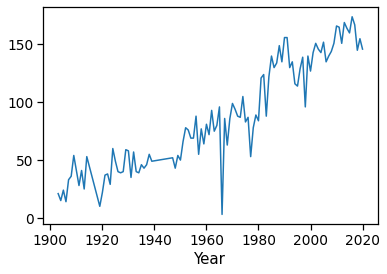

In [ ]:
rider_df.groupby('Year')['Rank'].nunique().plot(kind='line')
plt.show

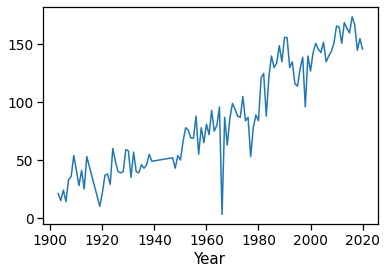

In [ ]:
rider_df.groupby(['Year'])['Rank'].count().plot()

**Subplots broken down by decade (in progress)**

In [ ]:
#create the arrays needed for the plot
first = array_year[0:50]
second = array_year[51:100]

first2 = array_winnerpace[0:50]
second2 = array_winnerpace[51:100]

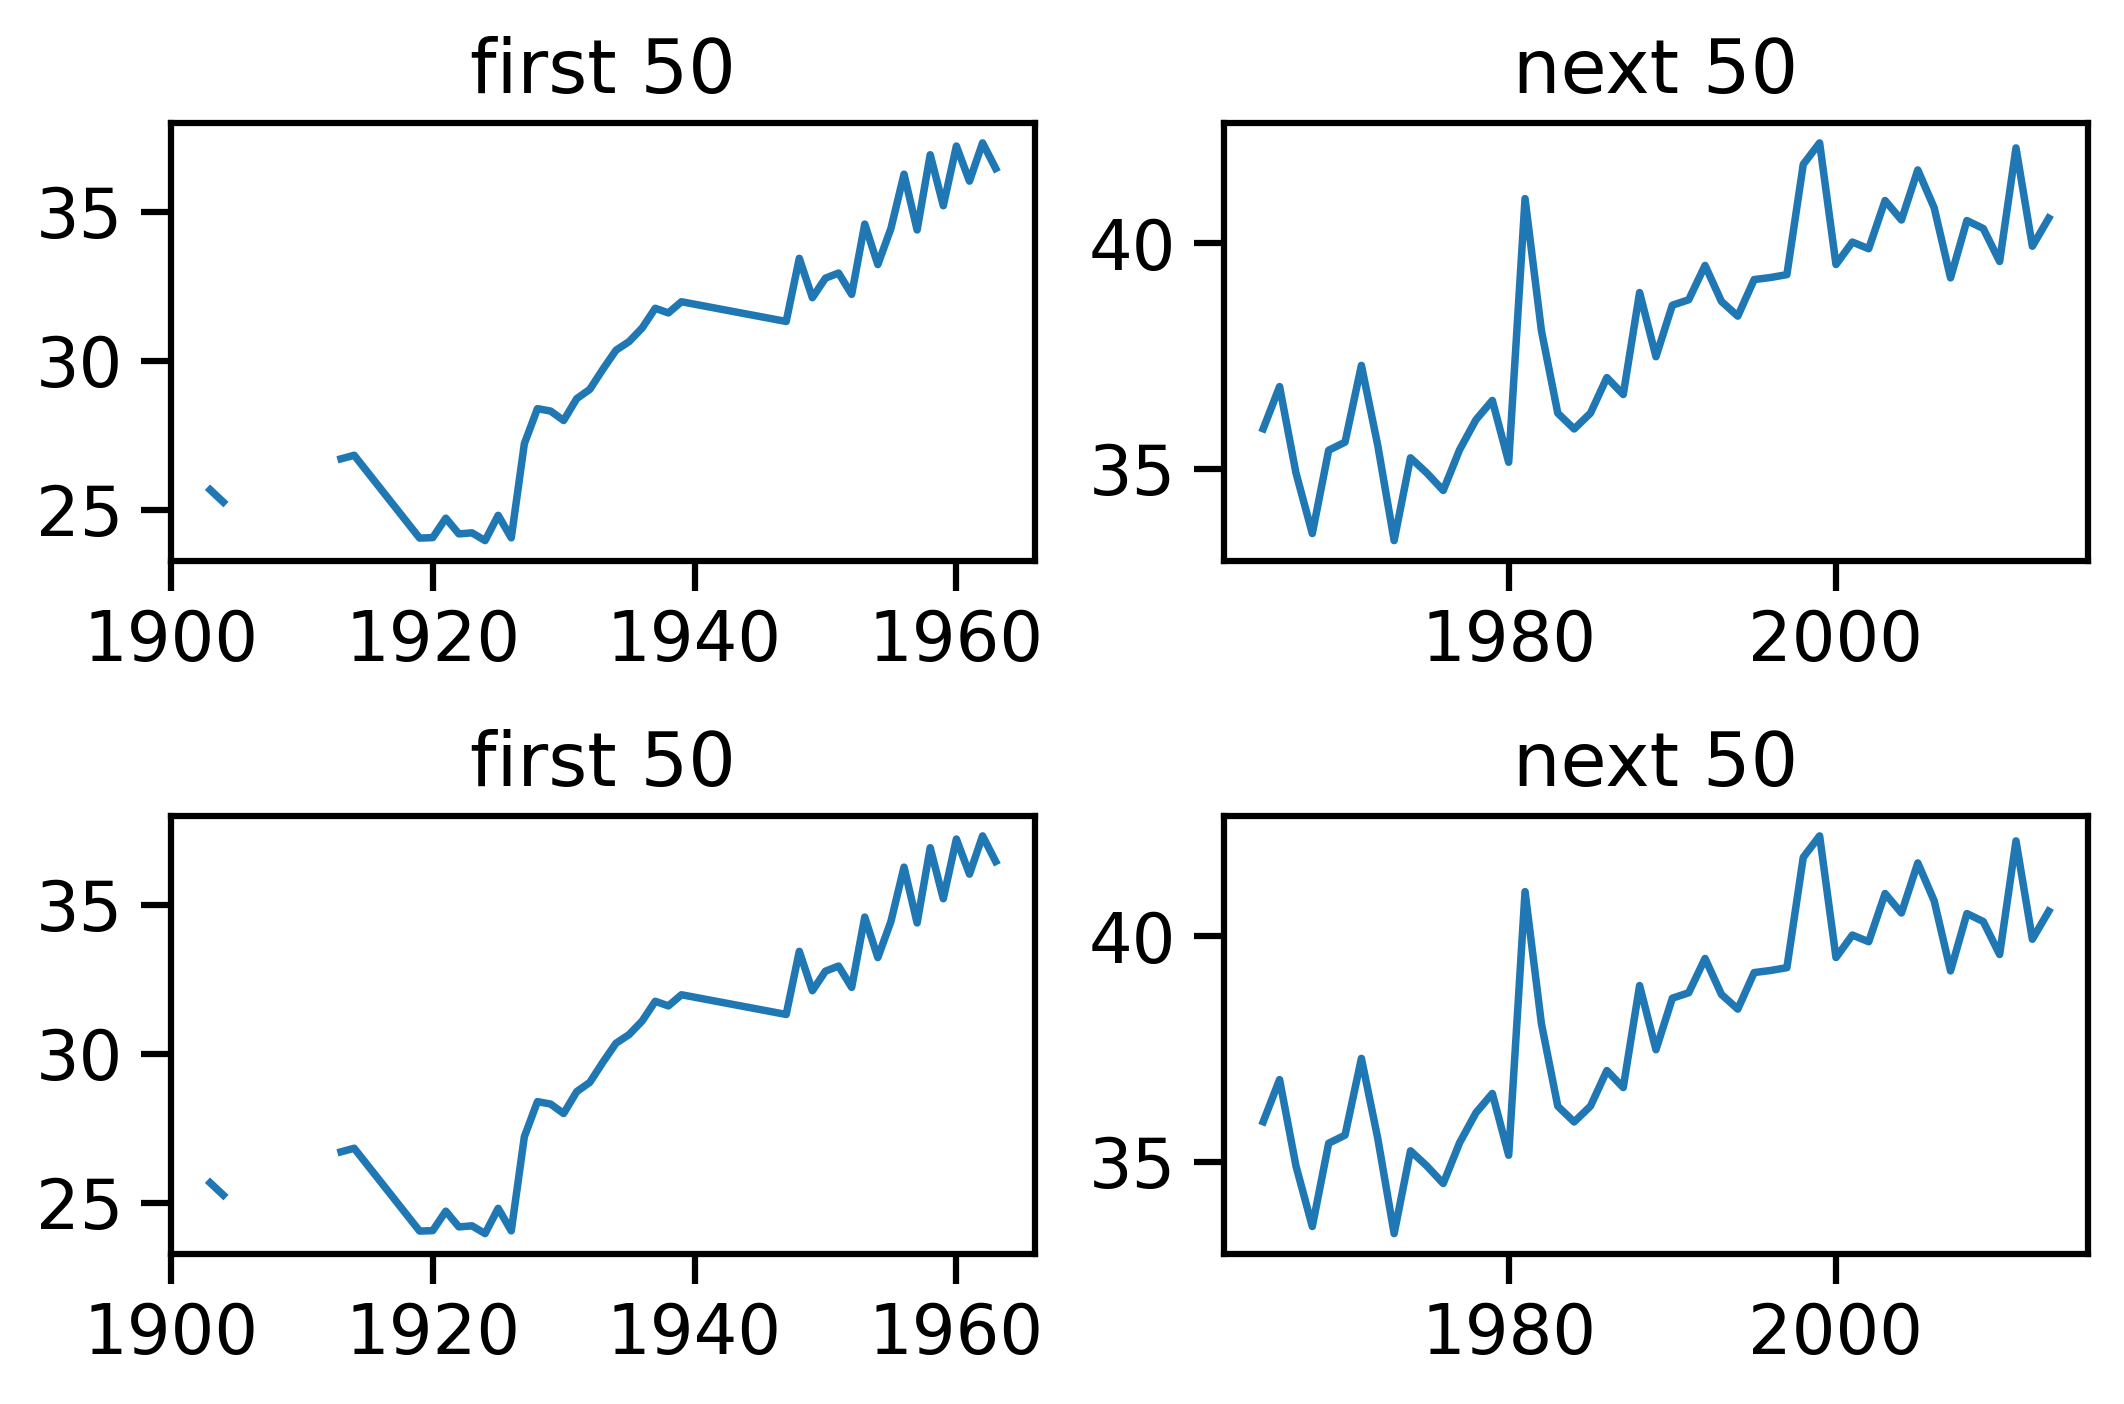

In [ ]:
fig, ( (ax1,ax2), (ax3,ax4) ) = plt.subplots(2,2)   

#first 50 winners

ax1.plot(first, first2)
ax1.set_title('first 50')

ax2.plot(second, second2)
ax2.set_title('next 50')

ax3.plot(first, first2)
ax3.set_title('first 50')

ax4.plot(second, second2)
ax4.set_title('next 50')

fig.tight_layout()
plt.show()

**Bar chart of all - and repeat - winners**

Helpful resource: https://pythonbasics.org/matplotlib-bar-chart/

This bar chart shows riders who have won the tour de france by number of wins

In [ ]:
df2['winner2'].value_counts()

BERNARD HINAULT     5
MIGUEL INDURAIN     5
EDDY MERCKX         5
JACQUES ANQUETIL    5
CHRIS FROOME        4
                   ..
LUCIEN AIMAR        1
JAN JANSSEN         1
STEPHEN ROCHE       1
FELICE GIMONDI      1
GEORGES SPEICHER    1
Name: winner2, Length: 67, dtype: int64

Text(0, 0.5, 'Number of Wins')

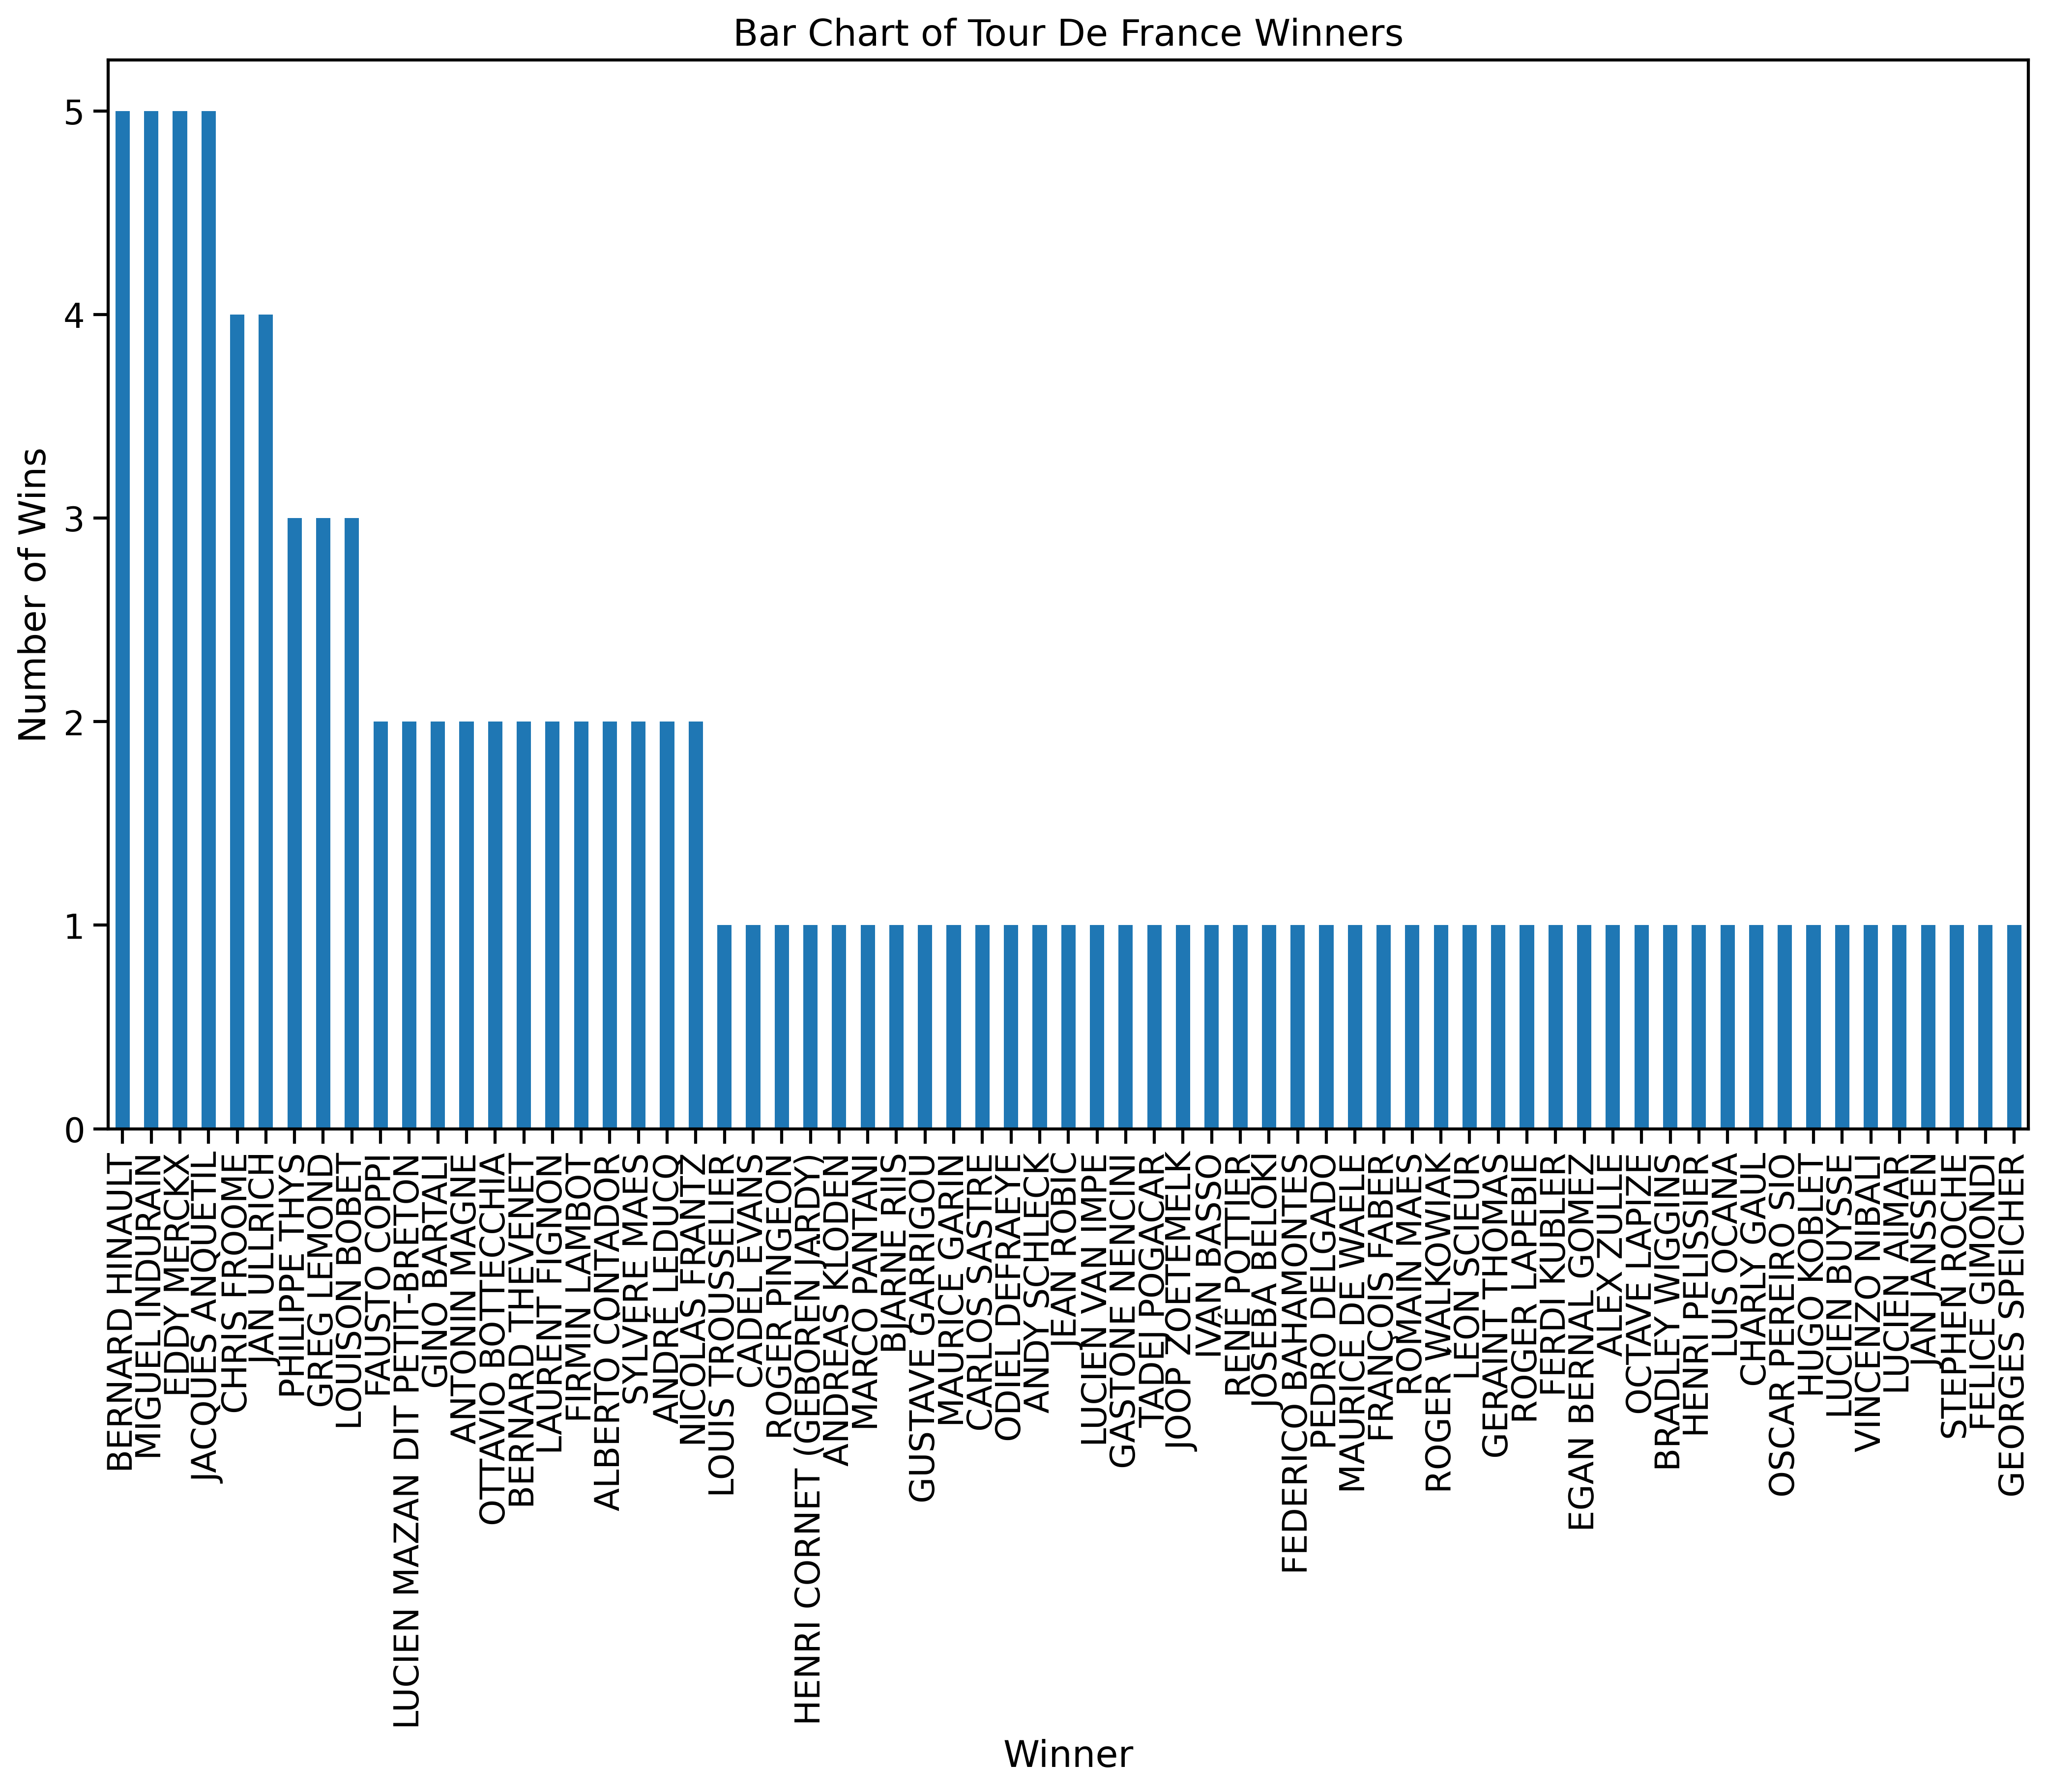

In [ ]:
ax = df2['winner2'].value_counts().plot(kind='bar',
                                        figsize=(14,8),
                                        title="Bar Chart of Tour De France Winners")
ax.set_xlabel("Winner")
ax.set_ylabel("Number of Wins")

the above graph is a bit busy. No offense to the many riders who've won a single tour, but lets see if we can trim it down to just the riders who have won multiple times

In [ ]:
df2['winner2'].value_counts().loc[lambda x : x>1]

BERNARD HINAULT                  5
MIGUEL INDURAIN                  5
EDDY MERCKX                      5
JACQUES ANQUETIL                 5
CHRIS FROOME                     4
JAN ULLRICH                      4
PHILIPPE THYS                    3
GREG LEMOND                      3
LOUISON BOBET                    3
FAUSTO COPPI                     2
LUCIEN MAZAN DIT PETIT-BRETON    2
GINO BARTALI                     2
ANTONIN MAGNE                    2
OTTAVIO BOTTECCHIA               2
BERNARD THEVENET                 2
LAURENT FIGNON                   2
FIRMIN LAMBOT                    2
ALBERTO CONTADOR                 2
SYLVÈRE MAES                     2
ANDRÉ LEDUCQ                     2
NICOLAS FRANTZ                   2
Name: winner2, dtype: int64

Text(0, 0.5, 'Number of Wins')

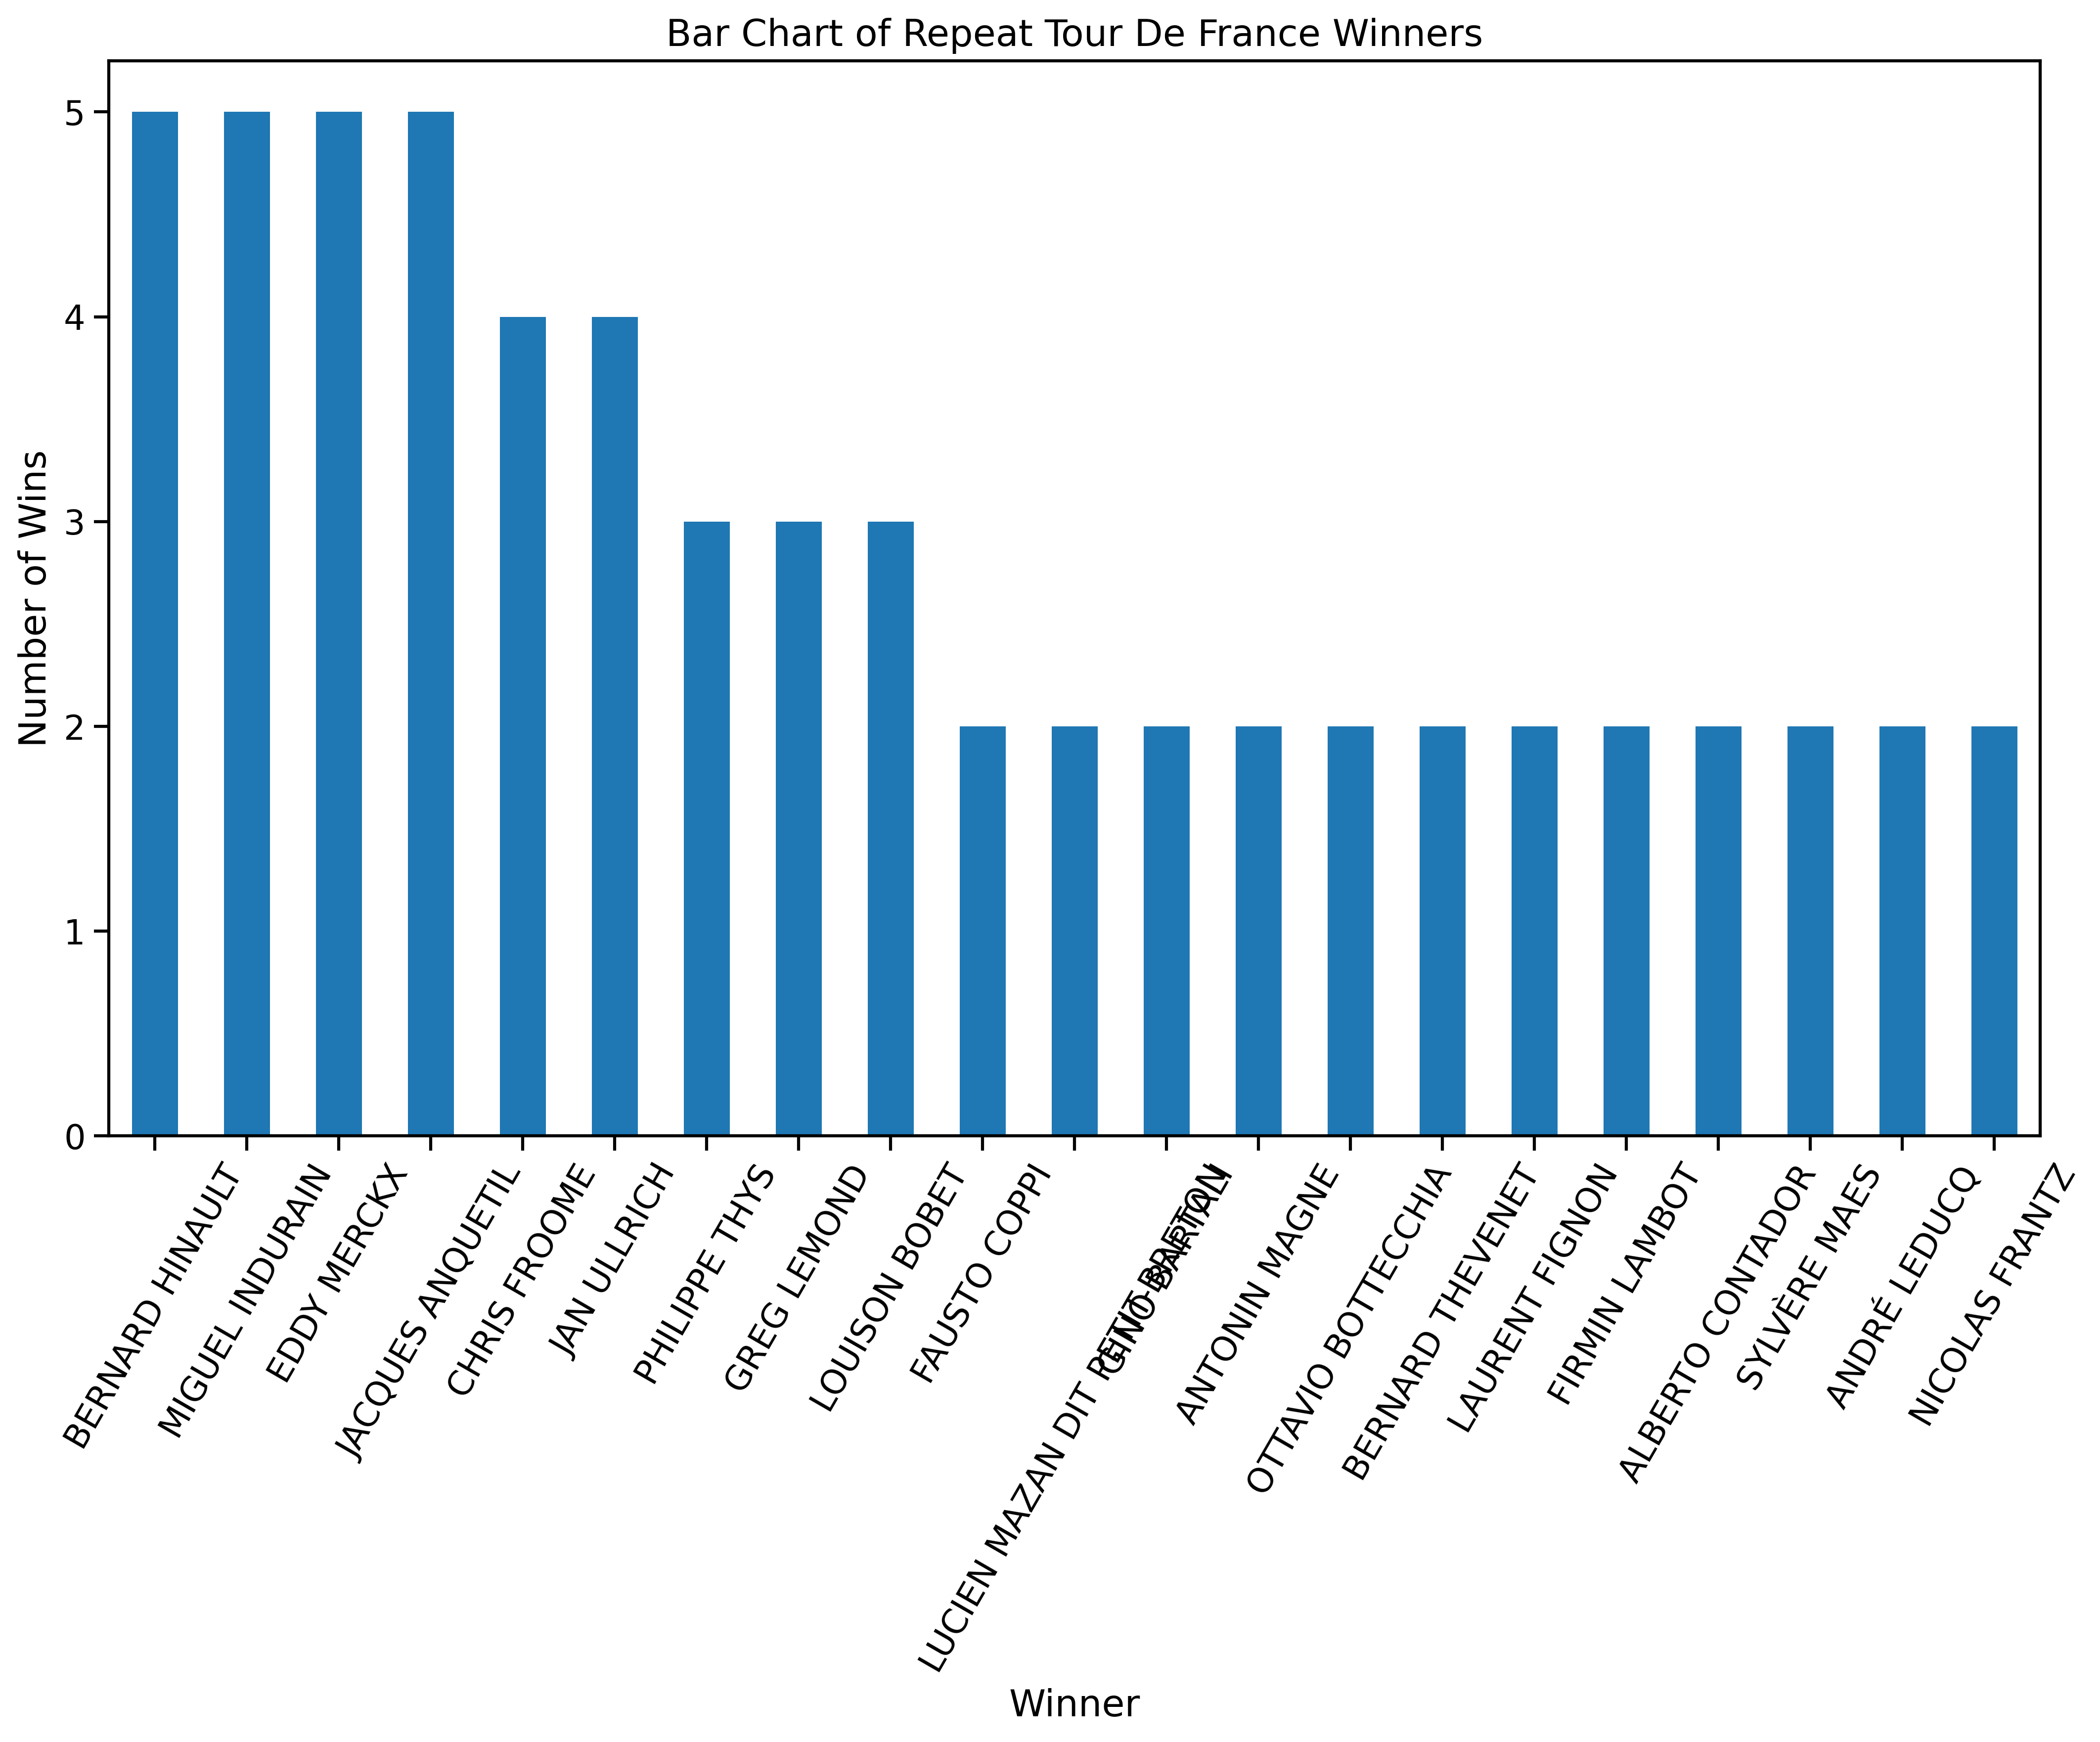

In [ ]:
df2['winner2'].value_counts().loc[lambda x : x>1]


ax = df2['winner2'].value_counts().loc[lambda x : x>1].plot(kind='bar',
                                        figsize=(14,8),
                                        title="Bar Chart of Repeat Tour De France Winners")
ax.set_xlabel("Winner")
#lets make it easier to read
degrees = 60
plt.xticks(rotation=degrees)
ax.set_ylabel("Number of Wins")

Text(0.5, 1.0, 'Bar chart of repeat winners')

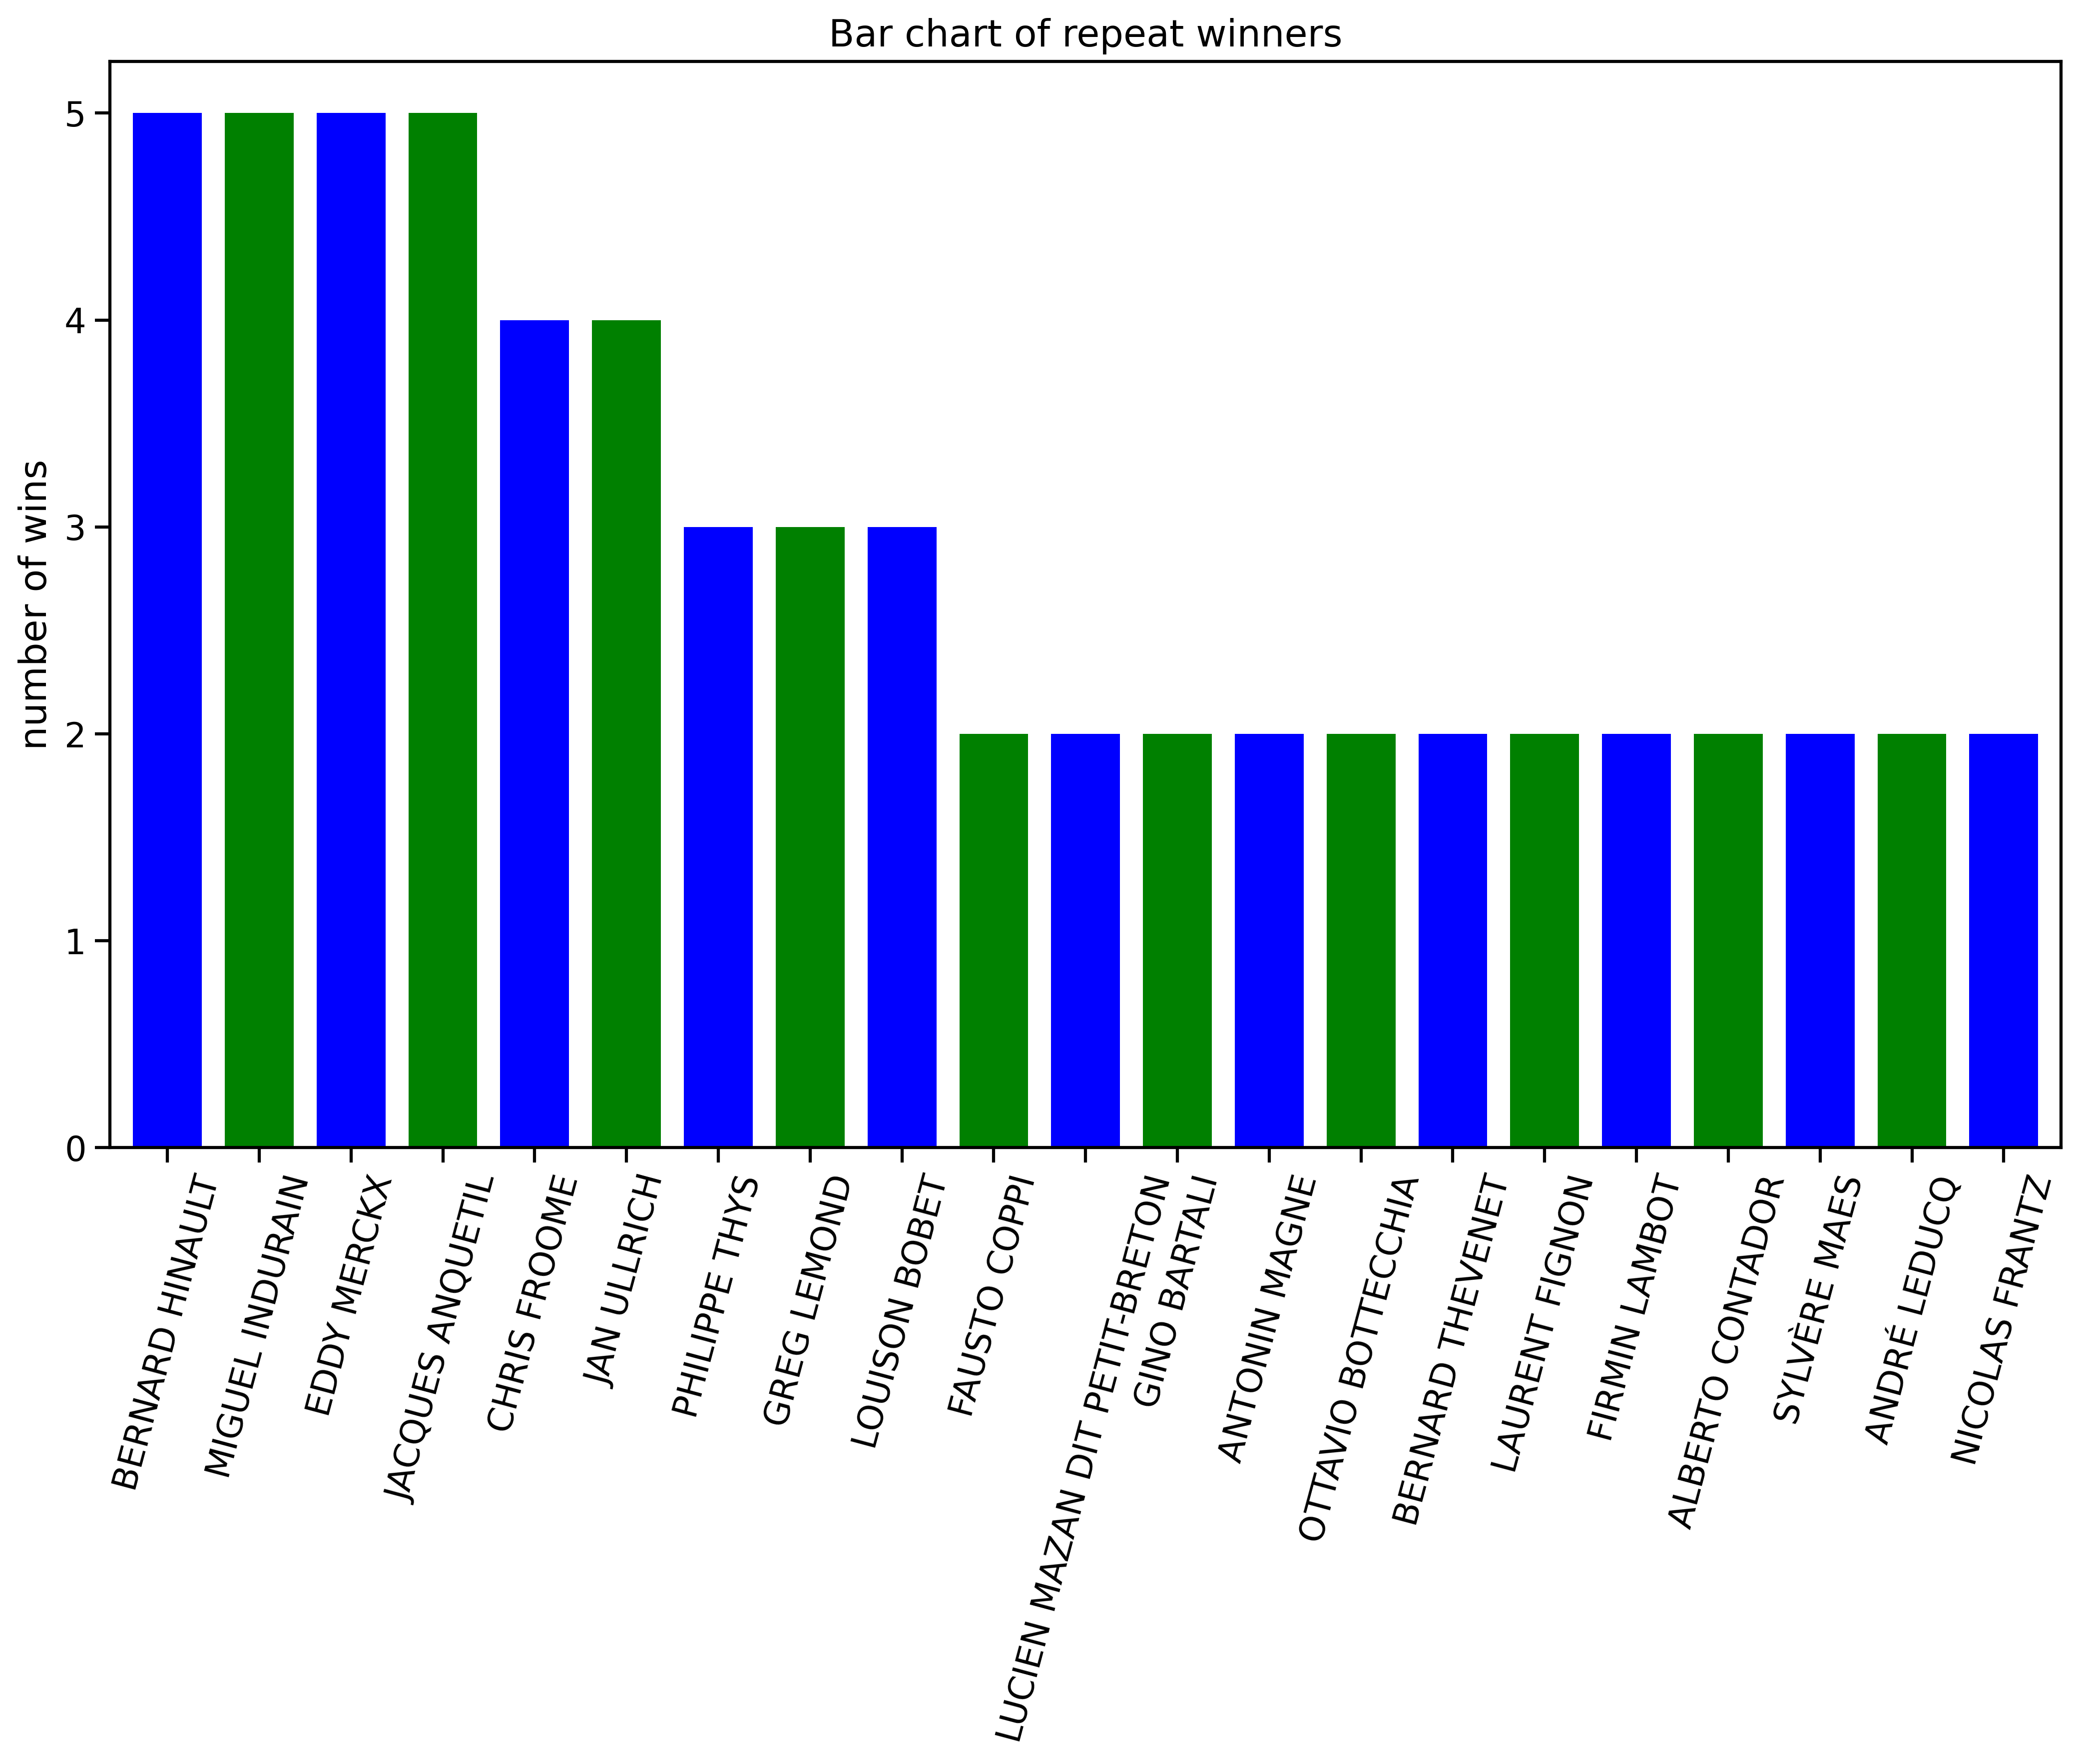

In [ ]:
df2['winner2'].value_counts().loc[lambda x : x>1].plot(kind='bar', align='center', width = .75,  figsize=(14,8), color=['blue', 'green']);

plt.ylabel('number of wins')
#lets make it easier to read
degrees = 75
plt.xticks(rotation=degrees)
plt.title('Bar chart of repeat winners')


**Time series scatterplot (with trendline)**

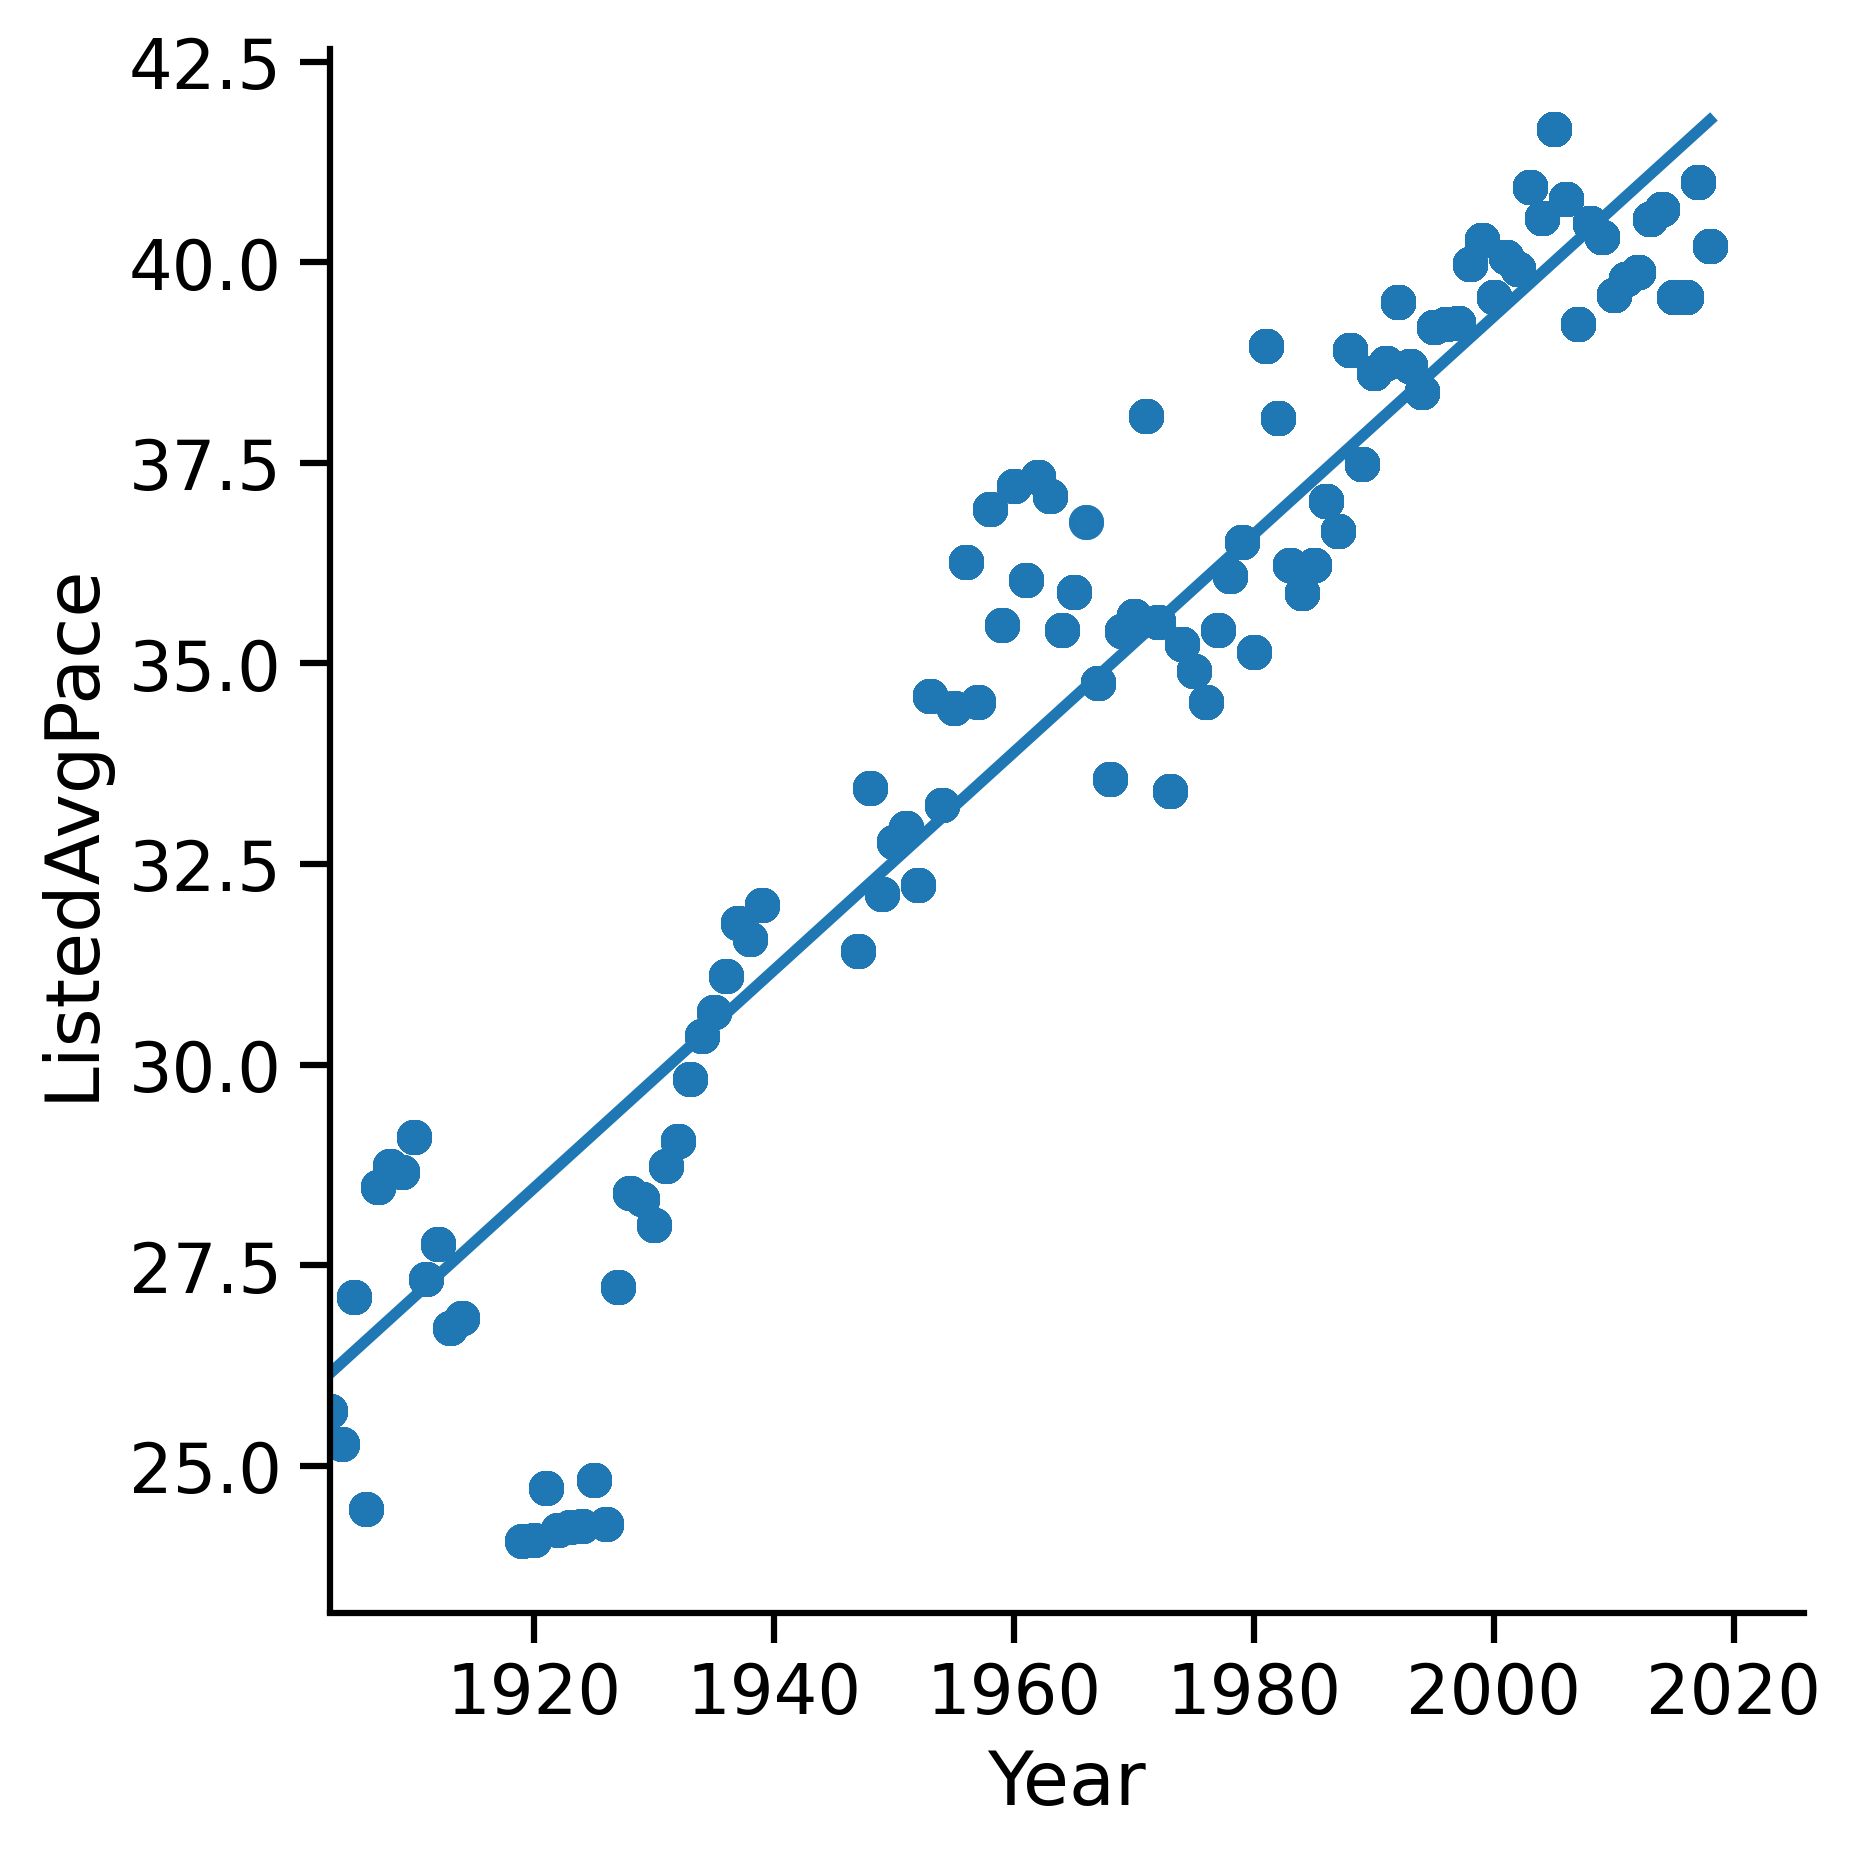

In [ ]:
df = rider_df

_ = sns.lmplot(x='Year', y='ListedAvgPace', data=df, ci=None)

**Comparing Distance to Pace over time** (multiple axes on a single plot)

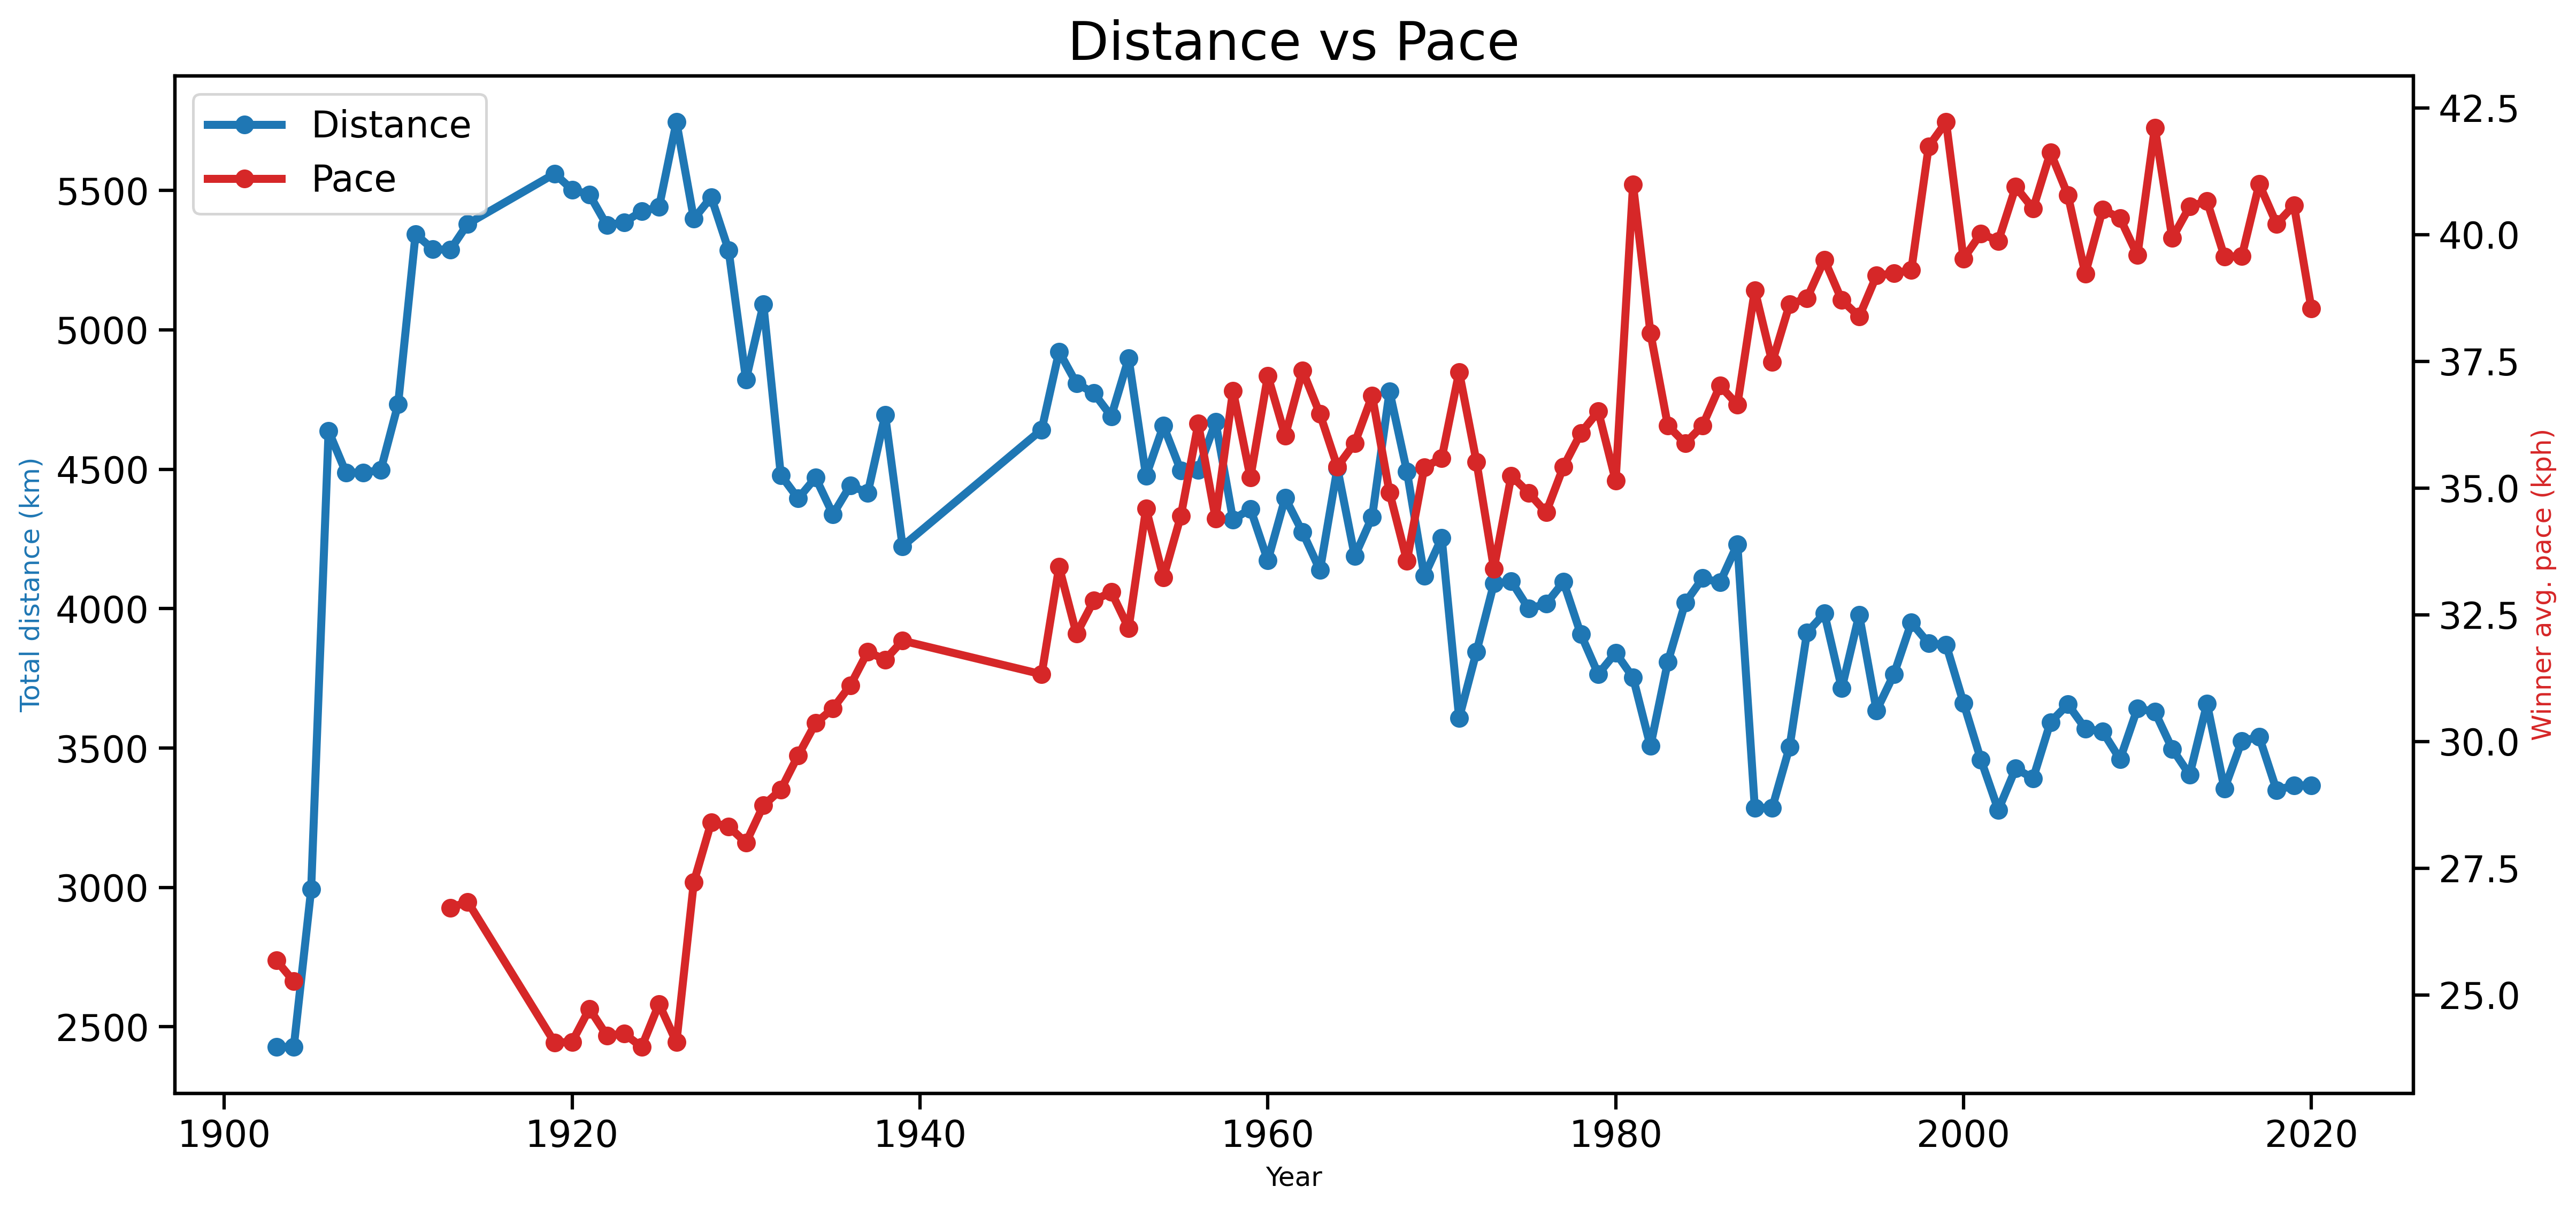

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,distance,"-o", lw = 3, label='Distance')
ax.set_ylabel("Total distance (km)",fontsize = 10,color = "tab:blue")

ax2 = ax.twinx()
ax2.plot(year,winnerpace,"-o",color = "tab:red",lw = 3,label='Pace')
ax2.set_ylabel("Winner avg. pace (kph)",fontsize = 10,color = "tab:red")
ax.set_xlabel("Year",fontsize=10)
#ax.grid("on")
ax.set_title("Distance vs Pace",fontsize=20)

#handling of label consolidation
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left');

**Graphing Predictions** (in progress)

In [ ]:
import fbprophet
# Prophet requires columns ds (Date) and y (value)
#rider_df = rider_df.rename(columns={year: 'ds', winnerpace: 'y'})

# Make the prophet model and fit on the data
#gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
#gm_prophet.fit(rider_df)

**Graphing with plotly**

In [ ]:
fig = px.line(rider_df, x="Year", y="ListedAvgPace")

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
          )
)


fig.show()

# Next Steps & Future Analysis

Some other things I'd like to add or try to this project:

*   [Add in the country - or teams - of winners, flags/codes/etc](https://www.topendsports.com/events/tour-de-france/winners-list.htm)
*   Create hover state of each winner for the year in the above charts
*   Color or highlight certain points in the winners chart for callouts
*   Predicting/forecasting - and charting - winner pace for next 10/15 years (based on data). The primary goal of time sereis analysis is forecasting
*   Anomoly detection (and explanation)

# Data Sources

These URLs contain the raw data files used to conduct the above analysis


*   https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv 
*   https://raw.githubusercontent.com/camminady/LeTourDataSet/master/Riders.csv




# Extra Resources


The below list is a collection of help sites and resources I came across when conducting this analysis

*  Time series mpatlot: https://saralgyaan.com/posts/plot-time-series-in-python-matplotlib-tutorial-chapter-8/
*   Labels and annotations https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
*  Line plot graphs with matplotlib (youtube) https://www.youtube.com/watch?v=AYorFcI1MTU
*  Dot plots in plotly https://plotly.com/python/dot-plots/
*   Matplotlib bar charts https://pythonspot.com/matplotlib-bar-chart/
*   More time series: https://unidata.github.io/python-training/workshop/Time_Series/basic-time-series-plotting/
*  Plotting two charts with different scales:  https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
*   Dropping first column of data from a data frame https://thispointer.com/pandas-delete-first-column-of-dataframe-in-python/
*   Getting multiple axes to return a single label https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a
*   Matplot lib style sheet https://www.python-graph-gallery.com/199-matplotlib-style-sheets
*   Plotly https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e


*   Plotly (line charts) https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
*   Plotly (text and annotations) https://plotly.com/python/text-and-annotations/
*   Time series analysis (wikipedia) https://en.wikipedia.org/wiki/Time_series


# Additional Tour De France Analysis

The Below list includes other forms of Tour De France data analysis

*   https://technology.amis.nl/data-analytics/tour-de-france-data-analysis-using-strava-data-in-jupyter-notebook-with-python-pandas-and-plotly-step-1-single-rider-loading-exploration-wrangling-visualization/
*   https://imgur.com/gallery/hKDOT5Y
*   https://medium.com/@Ben_Obe/a-brief-look-at-le-tour-de-france-through-the-lense-of-data-c6dc4a68f0c6
*   https://gist.github.com/cavedave/8115b0f5a74f4e088315587e5bdaa4b3
*   http://maiapelletier.rbind.io/post/tidytuesday-tour-de-france-winners/

